# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [60]:
import pandas as pd
import flatiron_stats as fl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [61]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, r

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [39]:
# View what each of the relevant columns look like
print(df.FormalEducation.head(), df.AdjustedCompensation.head())
print(df.FormalEducation.value_counts())

0    Bachelor's degree
1      Master's degree
2      Master's degree
3      Master's degree
4      Doctoral degree
Name: FormalEducation, dtype: object 0         NaN
1         NaN
2         NaN
3    250000.0
4         NaN
Name: AdjustedCompensation, dtype: float64
Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64


In [40]:
# Get compensation values for Bachelor's degree educated
df_bach = df.loc[df.FormalEducation == "Bachelor's degree"]

# Subset this by removing the null values for compensation
df_bach_sub = df_bach.loc[~df_bach.AdjustedCompensation.isna()]
df_bach_sub

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802310,64184.800
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,20882.400
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,1483.900
21,Male,United States,25.0,Employed part-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,20000.000
25,Male,Russia,22.0,Employed full-time,NaN,NaN,Yes,NaN,Data Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017402,10858.848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26031,Male,India,35.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,39050.000
26072,Male,Japan,32.0,Employed part-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009108,31878.000
26101,Male,Other,26.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000278,3336.000
26185,Male,Other,56.0,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,50000.000


In [41]:
# Get compensation values for Master's degree educated
df_mast = df.loc[df.FormalEducation == "Master's degree"]

# How many null values are there?
df_mast_sub = df_mast.loc[~df_mast.AdjustedCompensation.isna()]
df_mast_sub

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,250000.000
14,Male,Taiwan,26.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033304,36634.400
27,Male,Colombia,34.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000342,53352.000
31,Male,Poland,29.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.281104,35419.104
37,Male,Sweden,37.0,Employed full-time,NaN,NaN,Yes,NaN,Machine Learning Engineer,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,80000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26148,Male,India,42.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015620,54670.000
26159,Male,United States,39.0,Employed full-time,NaN,NaN,Yes,NaN,Other,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000
26180,Male,France,38.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.195826,65770.430
26255,Male,Norway,32.0,Employed full-time,NaN,NaN,Yes,NaN,Data Analyst,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.195826,89686.950


In [42]:
# Since we do not care whether one is greater than the other, we can do a two-sided t-test here, and we should use 
# Welch's t since we know we have different sample sizes and probably different sample variances

# Ho: There is no difference between wages of those with a Bachelor's degree and those with a Master's degree.
# ha: There is a difference in wages between those with a Bachelor's and Master's degree.

In [63]:
p_val = fl.p_value_welch_ttest(df_bach_sub.AdjustedCompensation, df_mast_sub.AdjustedCompensation, two_sided=True)
bach_mean = np.mean(df_bach_sub.AdjustedCompensation)
mast_mean = np.mean(df_mast_sub.AdjustedCompensation)
bach_med = np.median(df_bach_sub.AdjustedCompensation)
mast_med = np.median(df_mast_sub.AdjustedCompensation)
bach_size = np.count_nonzero(df_bach_sub.AdjustedCompensation)
mast_size = np.count_nonzero(df_mast_sub.AdjustedCompensation)

print(f"Mean Bachelor's Degree Pay:\t {bach_mean}")
print(f"Mean Master's Degree Pay:\t {mast_mean}")
print(f"Median Bachelor's Degree Pay:\t {bach_med}")
print(f"Median Master's Degree Pay:\t {mast_med}")
print(f"Bachelor's Degree Sample Size:\t {bach_size}")
print(f"Master's Degree Sample Size:\t {mast_size}")

print(f"p-value\t {round(p_val, 3)}")

Mean Bachelor's Degree Pay:	 64887.097994618794
Mean Master's Degree Pay:	 69139.8998712
Median Bachelor's Degree Pay:	 38399.4
Median Master's Degree Pay:	 53812.17000000001
Bachelor's Degree Sample Size:	 1099
Master's Degree Sample Size:	 1969
p-value	 0.662


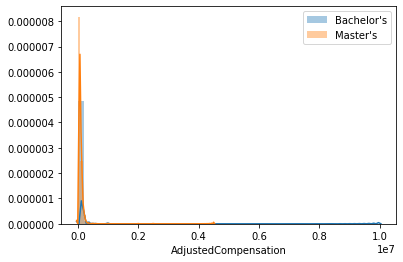

In [58]:
# Let's visualize a distribution to check out the data

dist_1 = df_bach_sub.AdjustedCompensation
dist_2 = df_mast_sub.AdjustedCompensation

sns.distplot(dist_1, label="Bachelor's")
sns.distplot(dist_2, label="Master's")
plt.legend();

# Looking at the distributions, there are some large outliers. I want to remove the data above 400k

In [52]:
# Removing observations above 400k for each dataset

df_bach_cut = df_bach_sub.loc[df_bach_sub.AdjustedCompensation < 400000]
df_bach_cut.AdjustedCompensation.value_counts()

df_mast_cut = df_mast_sub.loc[df_mast_sub.AdjustedCompensation < 400000]
df_mast_cut.AdjustedCompensation.value_counts()

120000.000    27
100000.000    27
71749.560     26
59791.300     26
150000.000    25
              ..
17000.000      1
309.672        1
50946.070      1
20239.488      1
1620.000       1
Name: AdjustedCompensation, Length: 917, dtype: int64

In [64]:
# Running two-sided welch's t again to how results look
p_val2 = fl.p_value_welch_ttest(df_bach_cut.AdjustedCompensation, df_mast_sub.AdjustedCompensation, two_sided=True)
bach_mean2 = np.mean(df_bach_cut.AdjustedCompensation)
mast_mean2 = np.mean(df_mast_cut.AdjustedCompensation)
bach_med2 = np.median(df_bach_cut.AdjustedCompensation)
mast_med2 = np.median(df_mast_cut.AdjustedCompensation)
bach_size2 = np.count_nonzero(df_bach_cut.AdjustedCompensation)
mast_size2 = np.count_nonzero(df_mast_cut.AdjustedCompensation)

print(f"Mean Bachelor's Degree Pay:\t {bach_mean2}")
print(f"Mean Master's Degree Pay:\t {mast_mean2}")
print(f"Median Bachelor's Degree Pay:\t {bach_med2}")
print(f"Median Master's Degree Pay:\t {mast_med2}")
print(f"Bachelor's Degree Sample Size:\t {bach_size2}")
print(f"Master's Degree Sample Size:\t {mast_size2}")

print(f"p-value\t {round(p_val2, 3)}")

Mean Bachelor's Degree Pay:	 53051.78790194641
Mean Master's Degree Pay:	 63557.54722324155
Median Bachelor's Degree Pay:	 38250.0
Median Master's Degree Pay:	 53352.0
Bachelor's Degree Sample Size:	 1093
Master's Degree Sample Size:	 1962
p-value	 0.0


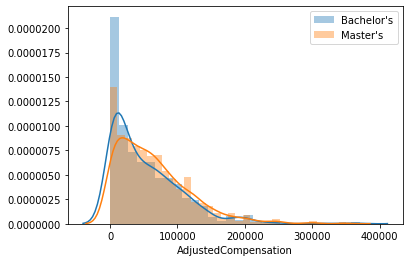

In [59]:
# Plotting distributions again after outlier removal

dist_1_rev = df_bach_cut.AdjustedCompensation
dist_2_rev = df_mast_cut.AdjustedCompensation

sns.distplot(dist_1_rev, label="Bachelor's")
sns.distplot(dist_2_rev, label="Master's")
plt.legend();

#### Based on the outlier removed t-test, we can reject the null hypothesis that compensation for those having Bachelor's or Master's degree is the same. Those with Master's degrees earn more on average.

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [67]:
# Can still use df_bach_cut and df_bach_sub for bachelor's data

# Need to get similar dataset for Doctorates, removing null values
df_doc_sub = df.loc[(df.FormalEducation == "Doctoral degree") & (~df.AdjustedCompensation.isna())]

df_doc_sub.AdjustedCompensation.value_counts()

150000.00    23
100000.00    17
120000.00    16
160000.00    14
59791.30     14
             ..
153000.00     1
21039.84      1
93903.00      1
64292.00      1
15584.00      1
Name: AdjustedCompensation, Length: 498, dtype: int64

In [74]:
p_val = fl.p_value_welch_ttest(df_bach_sub.AdjustedCompensation, df_doc_sub.AdjustedCompensation, two_sided=True)
bach_mean = np.mean(df_bach_sub.AdjustedCompensation)
doc_mean = np.mean(df_doc_sub.AdjustedCompensation)
bach_med = np.median(df_bach_sub.AdjustedCompensation)
doc_med = np.median(df_doc_sub.AdjustedCompensation)
bach_size = np.count_nonzero(df_bach_sub.AdjustedCompensation)
doc_size = np.count_nonzero(df_doc_sub.AdjustedCompensation)

print(f"Mean Bachelor's Degree Pay:\t {bach_mean}")
print(f"Mean Doctorl Degree Pay:\t {doc_mean}")
print(f"Median Bachelor's Degree Pay:\t {bach_med}")
print(f"Median Doctoral Degree Pay:\t {doc_med}")
print(f"Bachelor's Degree Sample Size:\t {bach_size}")
print(f"Doctoral Degree Sample Size:\t {doc_size}")

print(f"p-value\t {round(p_val, 3)}")

Mean Bachelor's Degree Pay:	 64887.097994618794
Mean Doctorl Degree Pay:	 29566175.762453098
Median Bachelor's Degree Pay:	 38399.4
Median Doctoral Degree Pay:	 74131.91999999997
Bachelor's Degree Sample Size:	 1099
Doctoral Degree Sample Size:	 963
p-value	 0.314


In [71]:
# Going to remove results above 400k for doctoral degrees

df_doc_cut = df_doc_sub.loc[df_doc_sub.AdjustedCompensation < 400000]
df_doc_cut.AdjustedCompensation.value_counts()

150000.000    23
100000.000    17
120000.000    16
160000.000    14
59791.300     14
              ..
57.843         1
153000.000     1
21039.840      1
93903.000      1
15584.000      1
Name: AdjustedCompensation, Length: 494, dtype: int64

In [75]:
# Now running welch's two-sided t again
p_val = fl.p_value_welch_ttest(df_bach_cut.AdjustedCompensation, df_doc_cut.AdjustedCompensation, two_sided=True)
bach_mean = np.mean(df_bach_cut.AdjustedCompensation)
doc_mean = np.mean(df_doc_cut.AdjustedCompensation)
bach_med = np.median(df_bach_cut.AdjustedCompensation)
doc_med = np.median(df_doc_cut.AdjustedCompensation)
bach_size = np.count_nonzero(df_bach_cut.AdjustedCompensation)
doc_size = np.count_nonzero(df_doc_cut.AdjustedCompensation)

print(f"Mean Bachelor's Degree Pay:\t {bach_mean}")
print(f"Mean Doctorl Degree Pay:\t {doc_mean}")
print(f"Median Bachelor's Degree Pay:\t {bach_med}")
print(f"Median Doctoral Degree Pay:\t {doc_med}")
print(f"Bachelor's Degree Sample Size:\t {bach_size}")
print(f"Doctoral Degree Sample Size:\t {doc_size}")

print(f"p-value\t {round(p_val, 3)}")

Mean Bachelor's Degree Pay:	 53051.78790194641
Mean Doctorl Degree Pay:	 85542.58034526091
Median Bachelor's Degree Pay:	 38250.0
Median Doctoral Degree Pay:	 72990.87000000001
Bachelor's Degree Sample Size:	 1093
Doctoral Degree Sample Size:	 958
p-value	 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [76]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [103]:
# Before removing values greater than 400k for compensation (outliers)

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [104]:
df2 = df.loc[(df.AdjustedCompensation <= 400000)]

In [105]:
# After removing values greater than 400k for compensation (outliers)

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.978241e+11     6.0  31.005677  1.144967e-36
Residual            1.387276e+13  4317.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!